In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv, os
from datetime import datetime
from IPython.core.display import Image

# We can display plots in the notebook using this line of code
%matplotlib inline

# Optional Task
This project requires your team to build a model aiming to understand the underlying relationship between patient attributes and progression of diabetes.

Sklearn already provides us with this data.

Check out this [link](http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) for more information.


In [11]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
data_diabetes = load_diabetes()

In [58]:
ddcol = ['Age','Sex','Body Mass Index','Avg Blood Pressure', 'Blood Serum 1',
         'Blood Serum 2','Blood Serum 3','Blood Serum 4','Blood Serum 5','Blood Serum 6']
dd = pd.DataFrame(data_diabetes['data'],
                  columns= ddcol)
dd['target'] = data_diabetes['target']
dd.head()
#Features have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

,Age,Sex,Body Mass Index,Avg Blood Pressure,Blood Serum 1,Blood Serum 2,Blood Serum 3,Blood Serum 4,Blood Serum 5,Blood Serum 6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [74]:
dd.describe()

,Age,Sex,Body Mass Index,Avg Blood Pressure,Blood Serum 1,Blood Serum 2,Blood Serum 3,Blood Serum 4,Blood Serum 5,Blood Serum 6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


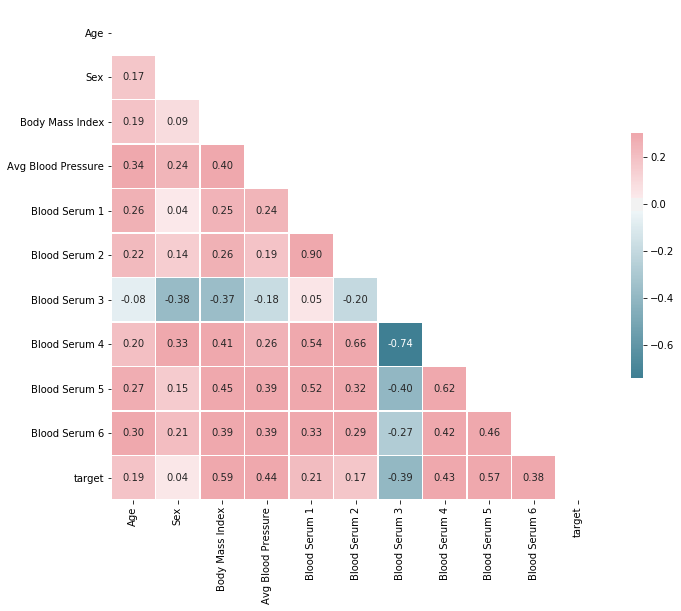

In [112]:
corr = dd.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [60]:
X_test_reg.shape

(146, 12)

In [61]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(dd.loc[:, dd.columns != 'target'], dd['target'], test_size=0.33, random_state=420)

In [62]:
from sklearn.linear_model import LinearRegression
### code here
linreg = LinearRegression()
linreg.fit(X_train_reg , y_train_reg)
y_pred_reg = linreg.predict(X_test_reg)

In [63]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_pred_reg, y_test_reg)
print('Model Mean Absolute Error- {}'.format(MAE))

Model Mean Absolute Error- 42.62263495503341


In [64]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred_reg, y_test_reg)
rmse = np.sqrt(mse)
print('Model Root Mean Square Error- {}'.format(rmse))

Model Root Mean Square Error- 51.86896454126197


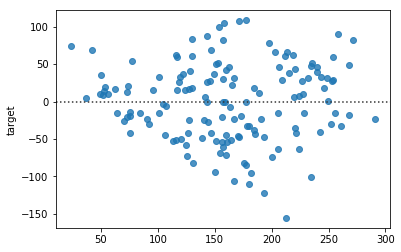

In [65]:
sns.residplot(y_pred_reg , y_test_reg)

In [66]:
formattedytest.columns

Index(['target'], dtype='object')

In [67]:
outcome = X_test_reg.copy()
outcome['actual'] = y_test_reg
outcome['pred'] = y_pred_reg

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


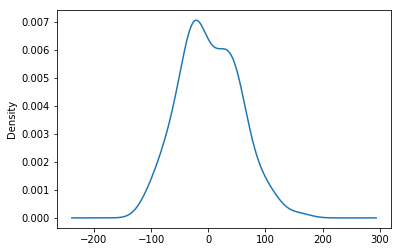

In [72]:
#Outliers: 
difference_clean = outcome['pred'].reshape(len(outcome['pred']),) - outcome['actual'].reshape(len(outcome['actual']),)
difference_clean.plot.density()

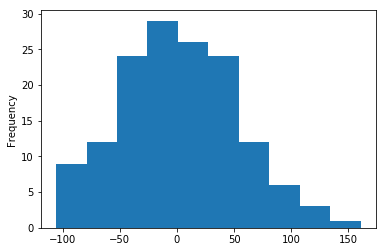

In [73]:
difference_clean.plot.hist()

In [101]:
outcome['diff'] = outcome['pred'] - outcome['actual']
print('\n-----------------------------\n',outcome.sample(5),'\n-----------------------------\n')
outcome.describe()


-----------------------------
           Age       Sex  Body Mass Index  Avg Blood Pressure  Blood Serum 1  \
157 -0.001882  0.050680        -0.033151           -0.018294       0.031454   
267  0.059871 -0.044642        -0.000817           -0.084857       0.075484   
219 -0.089063 -0.044642        -0.041774           -0.019442      -0.066239   
32   0.034443  0.050680         0.125287            0.028758      -0.053855   
248 -0.041840 -0.044642         0.047685            0.059744       0.127771   

     Blood Serum 2  Blood Serum 3  Blood Serum 4  Blood Serum 5  \
157       0.042840      -0.013948       0.019917       0.010226   
267       0.079478       0.004460       0.034309       0.023375   
219      -0.074277       0.008142      -0.039493       0.001144   
32       -0.012900      -0.102307       0.108111       0.000271   
248       0.128016      -0.024993       0.108111       0.063893   

     Blood Serum 6  actual        pred    n       diff  
157       0.027917    84.0  126.1

,Age,Sex,Body Mass Index,Avg Blood Pressure,Blood Serum 1,Blood Serum 2,Blood Serum 3,Blood Serum 4,Blood Serum 5,Blood Serum 6,actual,pred,n,diff
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.001626,-0.002204,0.005635,0.003691,0.002531,0.002864,-0.005071,0.007156,0.004046,0.006384,159.000000,161.100340,214.239726,2.100340
std,0.046999,0.047537,0.050163,0.048405,0.047306,0.048135,0.045468,0.050380,0.050683,0.049595,76.784787,60.105520,123.418230,52.004827
min,-0.103593,-0.044642,-0.084886,-0.108957,-0.089630,-0.104340,-0.102307,-0.076395,-0.126097,-0.137767,37.000000,23.680505,11.000000,-105.620584
25%,-0.032759,-0.044642,-0.031804,-0.033214,-0.030120,-0.029419,-0.038799,-0.039493,-0.032624,-0.025930,90.250000,122.708928,116.250000,-33.873749
50%,0.007199,-0.044642,-0.003511,-0.000506,-0.004321,-0.002723,-0.010266,-0.002592,0.008637,0.007207,145.500000,159.401491,203.000000,-0.767302
75%,0.037168,0.050680,0.039871,0.035644,0.025950,0.027183,0.019187,0.034309,0.037232,0.036201,220.000000,208.191184,322.750000,40.847489
max,0.110727,0.050680,0.160855,0.125158,0.152538,0.198788,0.177497,0.185234,0.133396,0.135612,346.000000,290.832301,440.000000,160.532926


In [105]:
outcome.columns

Index(['Age', 'Sex', 'Body Mass Index', 'Avg Blood Pressure', 'Blood Serum 1',
       'Blood Serum 2', 'Blood Serum 3', 'Blood Serum 4', 'Blood Serum 5',
       'Blood Serum 6', 'actual', 'pred', 'n', 'diff'],
      dtype='object')

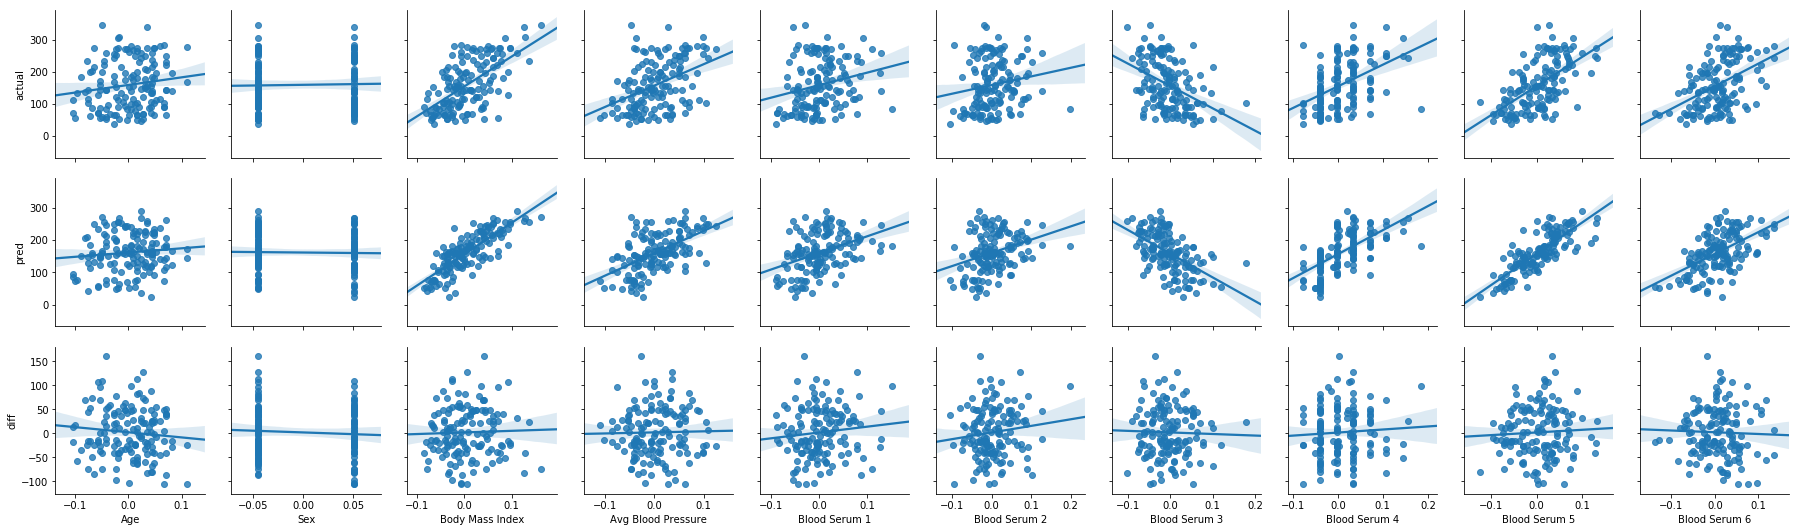

In [106]:
sns.pairplot(outcome , diag_kind="kde" , kind = 'reg', x_vars = ['Age', 'Sex', 'Body Mass Index', 'Avg Blood Pressure', 'Blood Serum 1',
       'Blood Serum 2', 'Blood Serum 3', 'Blood Serum 4', 'Blood Serum 5',
       'Blood Serum 6'] , y_vars = ['actual', 'pred', 'diff'])

In [115]:
X_train_reg.columns

Index(['Age', 'Sex', 'Body Mass Index', 'Avg Blood Pressure', 'Blood Serum 1',
       'Blood Serum 2', 'Blood Serum 3', 'Blood Serum 4', 'Blood Serum 5',
       'Blood Serum 6'],
      dtype='object')

In [132]:
# Rerun in statsmode: 
import statsmodels.api as sm
X = X_train_reg[[
    'Age', 
    'Sex', 'Body Mass Index', 'Avg Blood Pressure', 'Blood Serum 1',
       'Blood Serum 2'
                 , 'Blood Serum 3'
                 , 'Blood Serum 4'
    , 'Blood Serum 5'
    ,       'Blood Serum 6'
]]
y = y_train_reg
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     28.46
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           1.66e-37
Time:                        12:57:33   Log-Likelihood:                -1603.4
No. Observations:                 296   AIC:                             3229.
Df Residuals:                     285   BIC:                             3269.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                152.8273      3.252     46.994      0.000     146.426     159.228
Age                  -57.2859     76.008     -0.754      0.452    -206.894      92.322
Sex                 -270.9119     78.142     -3.467      0.001    -424.721    -117.103
Body Mass Index      515.4947     87.167      5.914      0.000     343.922     687.068
Avg Blood Pressure   345.7024     83.212      4.154      0.000     181.914     509.491
Blood Serum 1       -990.1163    549.780     -1.801      0.073   -2072.260      92.027
Blood Serum 2        715.3864    456.247      1.568      0.118    -182.655    1613.428
Blood Serum 3        147.6788    269.955      0.547      0.585    -383.680     679.037
Blood Serum 4        147.7137    212.132      0.696      0.487    -269.830     565.257
Blood Serum 5        859.3406    228.284      3.764      0.000     410.004    1308.677
Blood Serum 6         40.6719     84.375      0.482      0.630    -125.406     206.749
==============================================================================
Omnibus:                        1.095   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.130
Skew:                           0.065   Prob(JB):                        0.568
Kurtosis:                       2.726   Cond. No.                         240.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

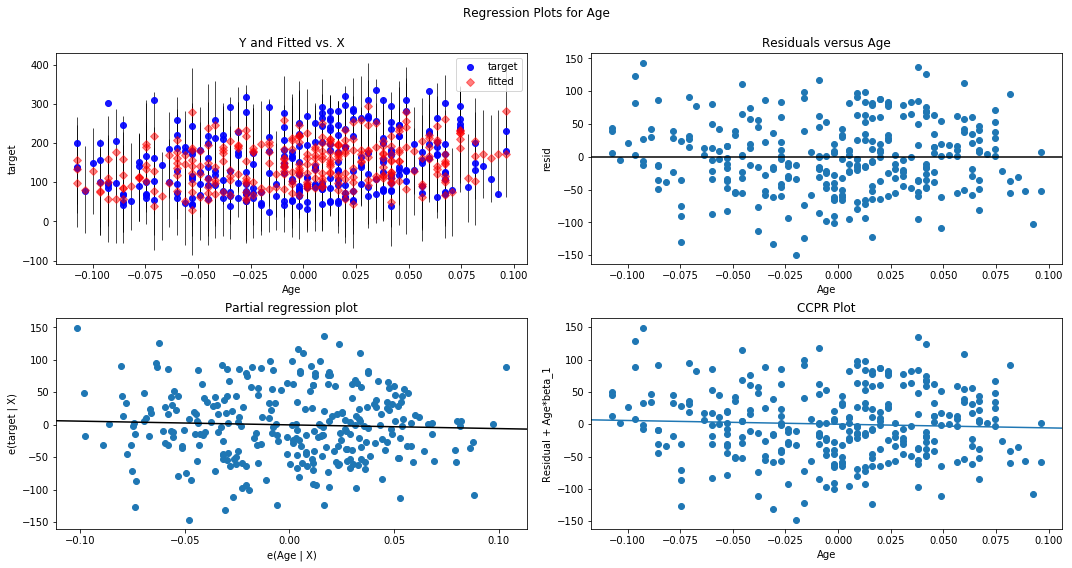

In [137]:
#Just one variable

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)

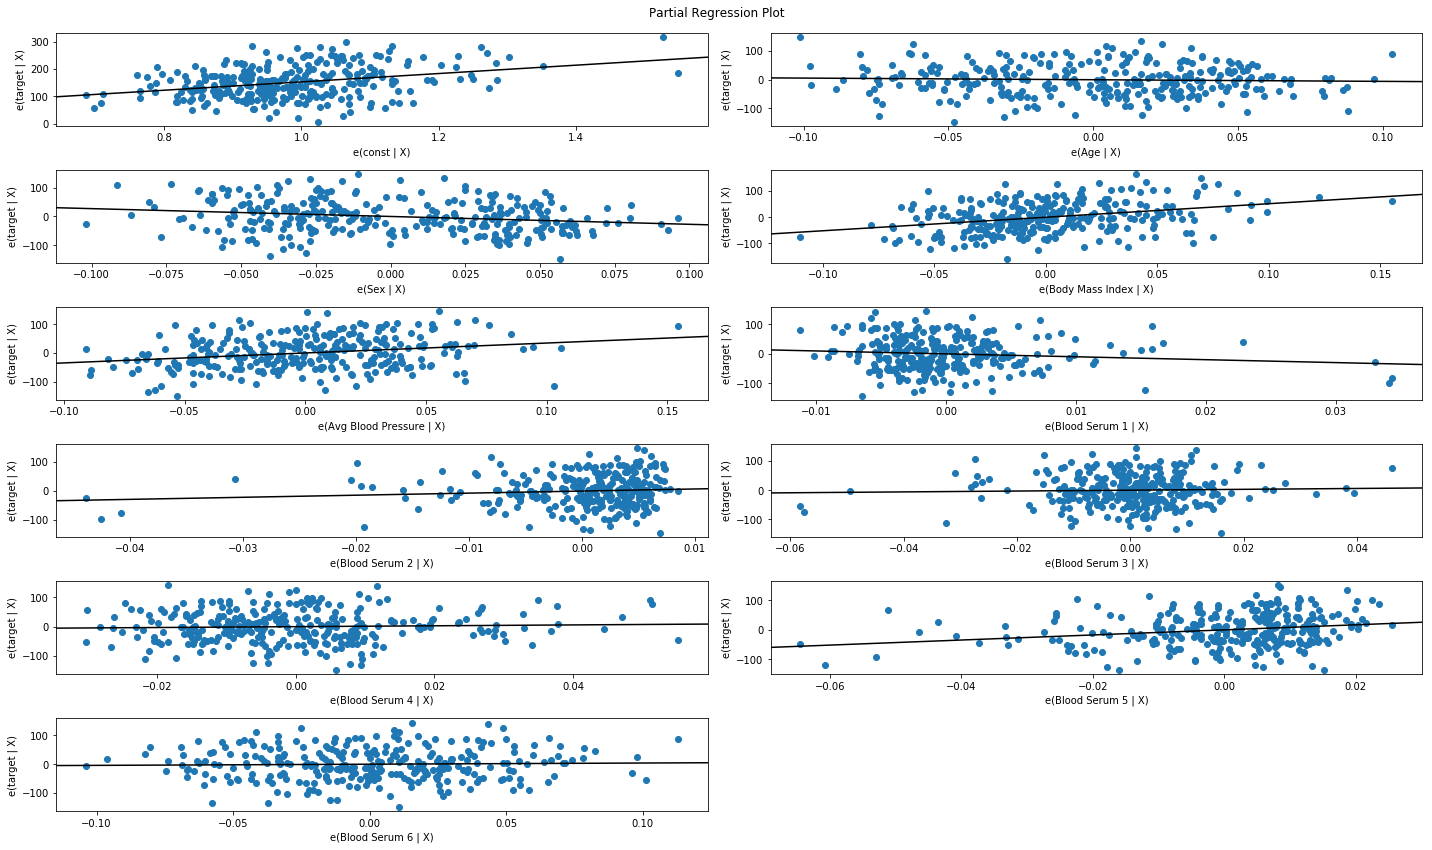

In [135]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

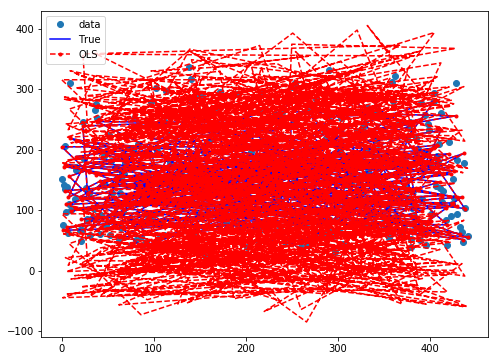

In [145]:

from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = sm.sandbox.regression.predstd .wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, model.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

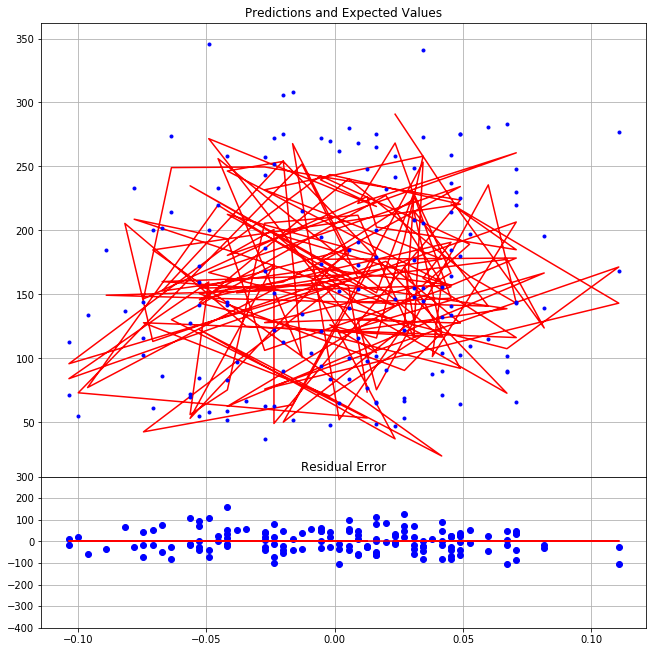

In [102]:
fig3 = plt.figure(2)
fig3.set_size_inches(10.5, 10.5)
frame1= fig3.add_axes((.1,.3,.8,.6))
plt.title('Predictions and Expected Values')
plt.plot(outcome['Age'], outcome['pred'],'-r')
plt.plot(outcome['Age'], outcome['actual'],'.b') 

plt.grid()

#Calculate difference

frame2= fig3.add_axes((.1,.1,.8,.2))
plt.title('Residual Error')
plt.plot(outcome['Age'], outcome['diff'], 'ob')
plt.plot(outcome['Age'], [0]*len(X_test_reg), 'r')
plt.ylim(-400, 300)
plt.grid()
